In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [109]:
city_indx = 2
ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
indx_timestamp = [15, 7, 4]
indx_xlim = [0,0,9900]

In [110]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-04-06,675941,2020-03-30,68,SANTANDER,68081,BARRANCABERMEJA,7,1,F,...,NaN,NaN,Recuperado,2020-03-22,NaN,2020-04-06,2020-04-10,Tiempo,6,NaN
1,2020-04-09,675977,2020-04-03,68,SANTANDER,68081,BARRANCABERMEJA,37,1,M,...,NaN,NaN,Recuperado,2020-03-24,NaN,2020-04-09,2020-04-11,Tiempo,6,NaN
2,2020-04-11,964679,2020-04-04,68,SANTANDER,68081,BARRANCABERMEJA,80,1,F,...,NaN,NaN,Recuperado,2020-03-28,NaN,2020-04-11,2020-04-22,Tiempo,6,NaN
3,2020-04-11,964681,2020-04-06,68,SANTANDER,68081,BARRANCABERMEJA,74,1,F,...,NaN,NaN,NaN,2020-03-28,2021-05-03 00:00:00,2020-04-11,2020-04-22,NaN,6,NaN
4,2020-04-14,964682,2020-04-09,68,SANTANDER,68081,BARRANCABERMEJA,93,1,F,...,NaN,NaN,Recuperado,2020-04-06,NaN,2020-04-14,2020-04-24,Tiempo,6,NaN


Definición de parámetros

In [111]:
poblaciones = [581130, 316200, 191704]
promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
beta_array = [0.032, 0.033, 0.032]

β = beta_array[city_indx]   # 1/días
α = 1/7                     # 1/días
γ = 1/promedio_recuperacion # 1/días
ε = 1/(30*12)               # 1/días
R_0 = β/γ

Valores iniciales

In [112]:
# Valores iniciales
S0 = poblaciones[city_indx]
N  = S0 # población de Bucaramanga
E0 = 0
I0 = 1
R0 = 0
C0 = np.array([S0, E0, I0, R0])

Tiempos de simulación

In [113]:
# Simulation Time
dt = 0.01
tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][15]).days * 24 # días * 24 = horas
steps = int(tmax/dt)
t = np.linspace(0,tmax, steps)

Definicion de modelos a trabajar

SEIR Básico

In [114]:
def seir_basico(z, t):
    S, E, I, R = z
    dSdt = -((β*S*I)/N)
    dEdt =  ((β*S*I)/N) - α*E
    dIdt =  α*E   - γ*I
    dRdt =  γ*I
    return np.array([dSdt, dEdt, dIdt, dRdt])

SEIR Reinfección

In [115]:
def seir_reinfeccion(z, t):
    S, E, I, R = z
    dSdt = -((β*S*I)/N) + ε*R
    dEdt =  ((β*S*I)/N) - α*E
    dIdt =  α*E   - γ*I
    dRdt =  γ*I   - ε*R
    return np.array([dSdt, dEdt, dIdt, dRdt])

Text(0.5, 1.0, 'Data from: Barrancabermeja')

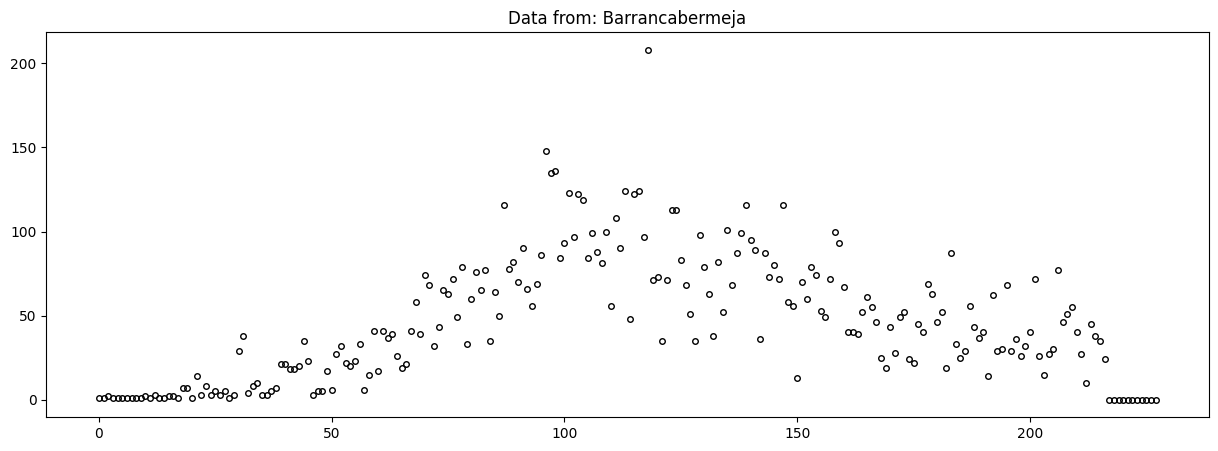

In [116]:
fig, ax = plt.subplots(figsize=(15, 5))
data_for_stuff = df.groupby('Fecha de inicio de síntomas').count()
data_fixed = data_for_stuff['Fecha de recuperación'].to_numpy()
t = np.arange(0, data_fixed.size)
ax.plot(data_fixed, marker='o', lw=0, ms=4, color='black', fillstyle='none')
ax.set_title(f'Data from: {ciudades[city_indx]}')

In [117]:
data_array = np.zeros((data_fixed.size, 4))
data_array[:,2] = data_fixed

SEIR Básico

/tmp/ipykernel_2689/2255784249.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_2689/2255784249.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Bucaramanga
β = 0.0327
γ = 0.02702702702702703
R_0 = 1.2099


/tmp/ipykernel_2689/2255784249.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_2689/2255784249.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Floridablanca
β = 0.0316
γ = 0.02564102564102564
R_0 = 1.2324000000000002


/tmp/ipykernel_2689/2255784249.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Barrancabermeja
β = 0.032593
γ = 0.02857142857142857
R_0 = 1.140755


/tmp/ipykernel_2689/2255784249.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);


Text(0.5, 0.935, 'Modelo SEIR Básico')

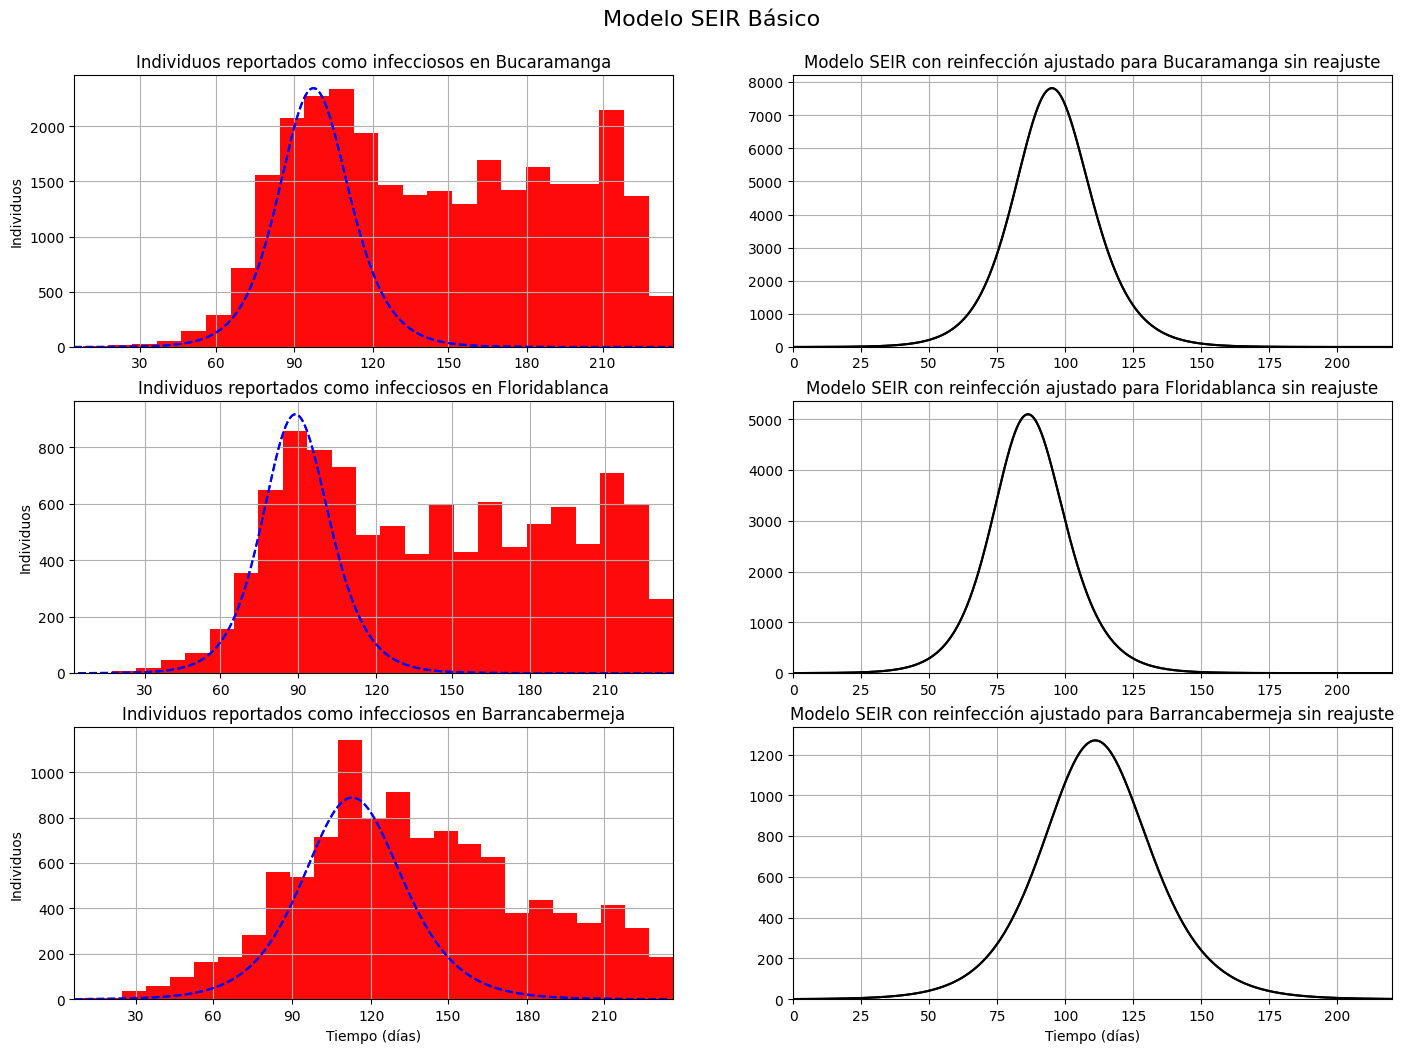

In [120]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]
        
        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.0327, 0.0316, 0.032593]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*24)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days*24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
        # Simulación
        sol = odeint(seir_basico, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        # data_for_stuff = df.groupby('Fecha de inicio de síntomas').count()
        # data_fixed = data_for_stuff['Fecha de recuperación'].to_numpy()
        #
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=30, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # Plot
        factor = 4.413e5
        t_mod = np.linspace(factor, factor + tmax, steps)
        prob_array = [0.7, 0.82, 0.3]
        ax[city, 0].plot(t_mod/24, (sol_I - (sol_I*prob_array[city_indx])), label='Modelo', color='blue', ls='--')
        ax[city, 1].plot(t/24, sol_I, label='Modelo', color='black', ls='-')

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 220)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR con reinfección ajustado para {ciudades[city_indx]} sin reajuste')

    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ = {γ}')
    print(f'R_0 = {R_0}')


ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')
ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')

fig.suptitle(f'Modelo SEIR Básico', fontsize=16, y=0.935)

/tmp/ipykernel_2689/4122648380.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_2689/4122648380.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Bucaramanga
β = 0.0327
γ = 0.02702702702702703
R_0 = 1.2099


/tmp/ipykernel_2689/4122648380.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);
/tmp/ipykernel_2689/4122648380.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Floridablanca
β = 0.0316
γ = 0.02564102564102564
R_0 = 1.2324000000000002


/tmp/ipykernel_2689/4122648380.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);




----------------------------------------------------------------------------------------------------
Ciudad: Barrancabermeja
β = 0.032593
γ = 0.02857142857142857
R_0 = 1.140755


/tmp/ipykernel_2689/4122648380.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[city, 0].set_xticklabels(labels);


Text(0.5, 0.935, 'Modelo SEIR Con Reinfección')

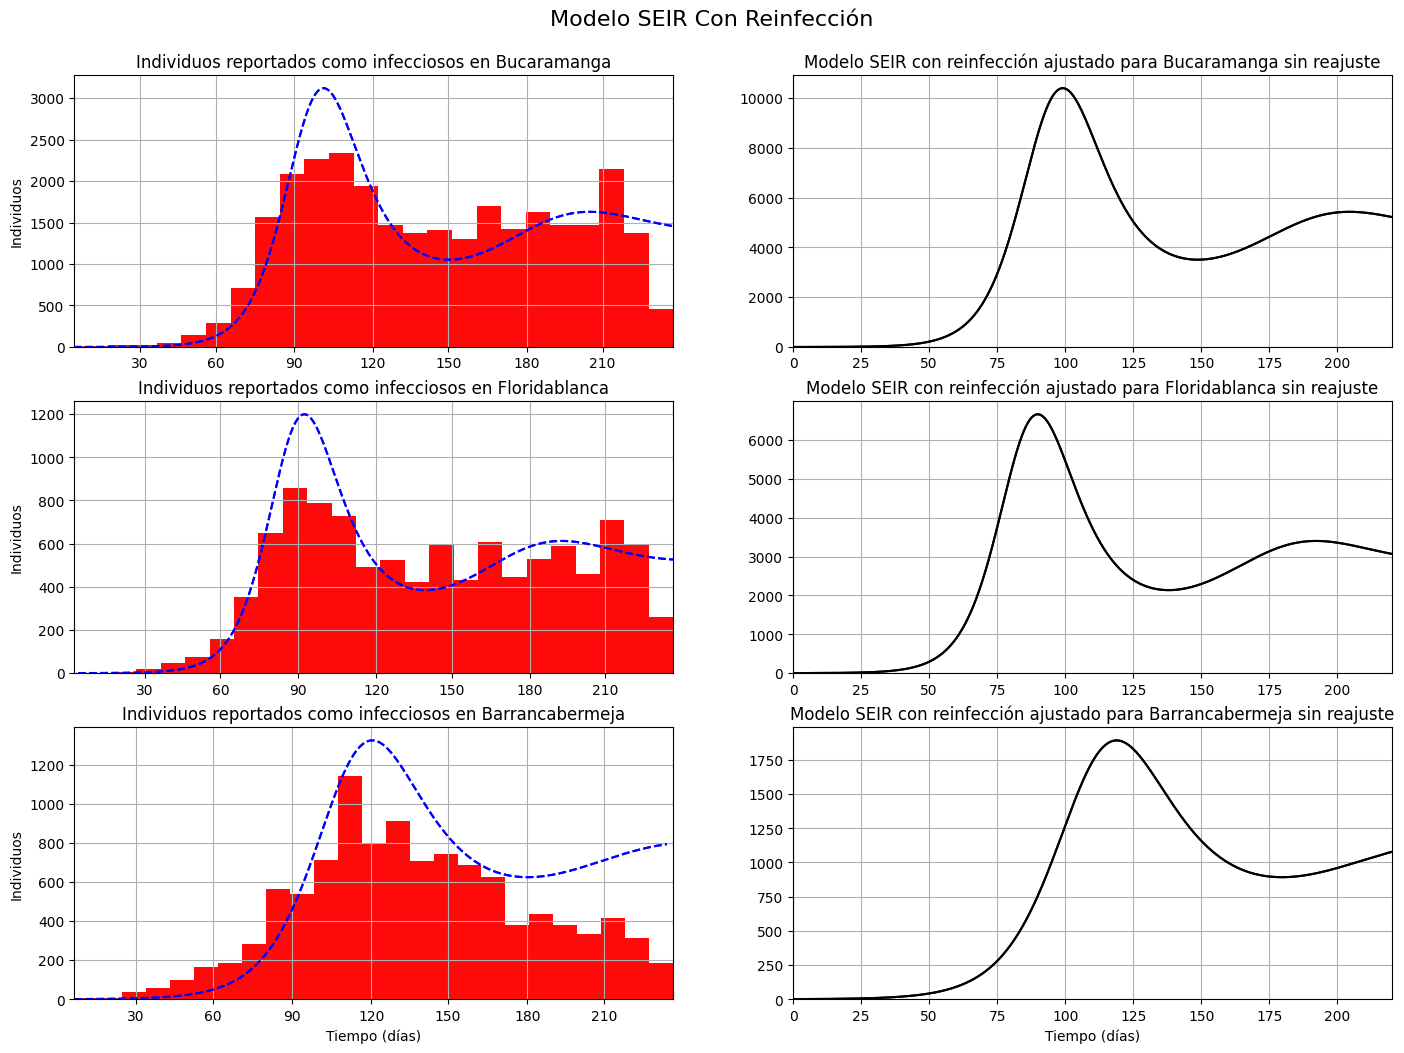

In [121]:
fig, ax = plt.subplots(3, 2 ,figsize=(17, 12))
for city in [0, 1, 2]:
    for column_ in [0, 1]:
        # Load Data
        city_indx = city
        ciudades = ['Bucaramanga', 'Floridablanca', 'Barrancabermeja']
        df = pd.read_csv(f'Casos_positivos_de_COVID-19_en_Colombia_{ciudades[city_indx]}.csv')
        df['fecha reporte web']= pd.to_datetime(df['fecha reporte web']).sort_values().to_list()
        df['Fecha de notificación']= pd.to_datetime(df['Fecha de notificación']).sort_values().to_list()
        df['Fecha de recuperación']= pd.to_datetime(df['Fecha de recuperación']).sort_values().to_list()
        df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas']).sort_values().to_list()
        df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico']).sort_values().to_list()
        indx_timestamp = [21, 8, 8]

        # Set Parameters 
        poblaciones = [581130, 316200, 191704]
        promedio_recuperacion = np.mean(df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']).days
        beta_array = [0.0327, 0.0316, 0.032593]

        β = beta_array[city_indx]   # 1/días
        α = 1/7                     # 1/días
        γ = 1/promedio_recuperacion # 1/días
        ε = 1/(30*24)               # 1/días
        R_0 = β/γ

        # Valores iniciales
        S0 = poblaciones[city_indx]
        N  = S0 # población de Bucaramanga
        E0 = 0
        I0 = 1
        R0 = 0
        C0 = np.array([S0, E0, I0, R0])

        # Simulation Time
        dt = 0.01
        tmax = (df['Fecha de inicio de síntomas'].max() - df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]]).days*24 # días * 24 = horas
        steps = int(tmax/dt)
        t = np.linspace(0,tmax, steps)
        
        # Simulación
        sol = odeint(seir_reinfeccion, C0 ,t)
        sol_S = sol[:,0]
        sol_E = sol[:,1]
        sol_I = sol[:,2]
        sol_R = sol[:,3]
        
        # Plot
        dias = len(df['Fecha de inicio de síntomas'].unique().tolist())
        ax[city, 0].hist(df['Fecha de inicio de síntomas'], bins=30, color='red', alpha=0.8, label='Infectados reportados')
        
        # lab
        labels = [item*30 for item in range(1, len(ax[city, 0].get_xticklabels()) + 1)];
        ax[city, 0].set_xticklabels(labels);

        # Plot
        factor = 4.413e5
        t_mod = np.linspace(factor, factor + tmax, steps)
        prob_array = [0.7, 0.82, 0.3]
        ax[city, 1].plot(t/24, sol_I, label='Modelo', color='black', ls='-')
        ax[city, 0].plot(t_mod/24, (sol_I - (sol_I*prob_array[city_indx])), label='Modelo', color='blue', ls='--')

        # Grid
        ax[city, column_].grid(True)

        # Limits
        ax[city, 0].set_xlim(df['Fecha de inicio de síntomas'][indx_timestamp[city_indx]], df['Fecha de inicio de síntomas'].max())
        ax[city, 1].set_xlim(0, 220)
        ax[city, 1].set_ylim(0)

        # Labeling
        ax[city, 0].set_title(f'Individuos reportados como infecciosos en {ciudades[city_indx]}')
        ax[city, 1].set_title(f'Modelo SEIR con reinfección ajustado para {ciudades[city_indx]} sin reajuste')

    print('\n')
    print('-' * 100)
    print(f'Ciudad: {ciudades[city]}')
    print(f'β = {β}')
    print(f'γ = {γ}')
    print(f'R_0 = {R_0}')

ax[0, 0].set_ylabel('Individuos')
ax[1, 0].set_ylabel('Individuos')
ax[2, 0].set_ylabel('Individuos')
ax[2, 0].set_xlabel('Tiempo (días)')
ax[2, 1].set_xlabel('Tiempo (días)')

fig.suptitle(f'Modelo SEIR Con Reinfección', fontsize=16, y=0.935)